# Prática 2 - Grafo de visibilidade de robô

Considere o problema de planejamento de caminho para veículos autônomos. Existem formas diferentes de representar o mapa em que o algoritmo de planejamento deve atuar. Em uma atividade anterior, nos preocupamos com mapas definidos por células, agora vamos trabalhar com uma representação topológica do ambiente (a versão mais à esquerda na figura abaixo).

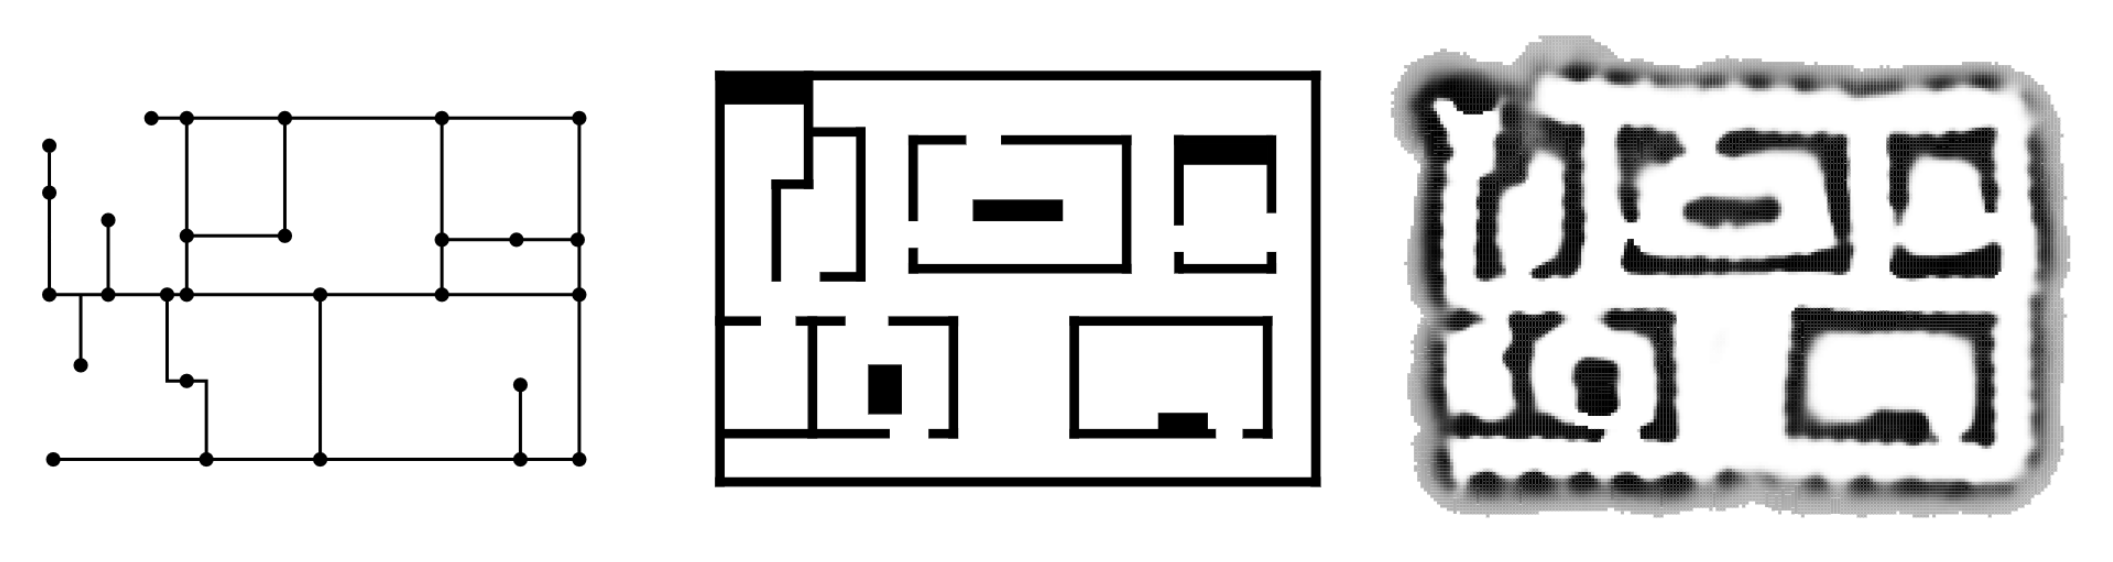

Podemos montar esse tipo de mapa, em um espaço poligonal, com uma técnica conhecida como Grafo de Visibilidade. A técnica pode ser observada no início do capítulo *Roadmaps* do livro [*Principles of Robot Motion*](https://mitpress.mit.edu/books/principles-robot-motion). Em resumo, consideramos como vértices regiões de interesse, como a posição inicial e desejada do robô, além dos pontos de "quinas" dos obstáculos.

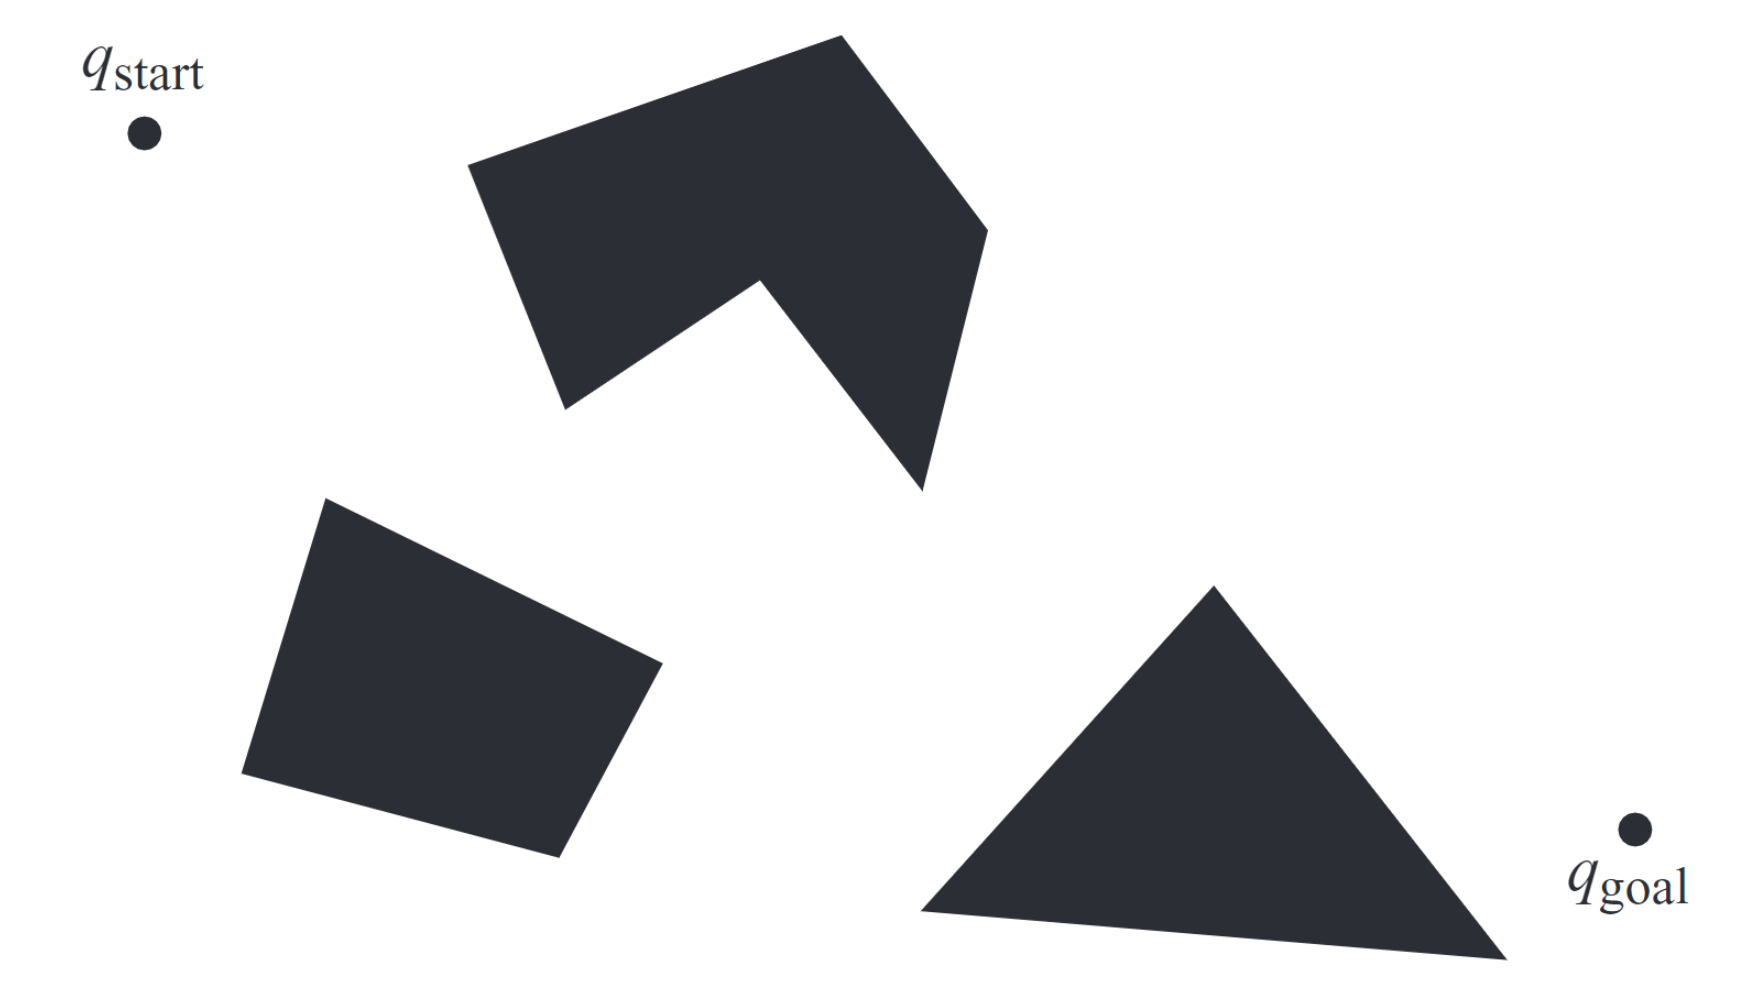

In [ ]:
# Considere que o arquivo esteja no formato a seguir:
q_start_x, q_start_y
q_goal_x, q_goal_y
<numero de obstaculos>
<numero de quinas>
x_quina, y_quina
...

# Um exemplo, apenas para conferência, é o mapa representado a seguir
1, 10
10, 1
3
4
2, 3.5
1.5, 1.5
3.5, 0.9
4.5, 2
6
5.5, 10.5
2.5, 9.75
2.75, 5.5
5, 7
6.25, 5.25
6.5, 8
3
8.5, 3.25
7.5, 0.5
9.25, 0.25

Dizemos que existe aresta entre dos vértices se houver visada direta entre eles, ou seja, se montamos uma linha reta entre os dois pontos, não há obstáculo, o robô se mantém no espaço de configurações livres de colisão. Podemos formalizar essa característica com a seguinte combinação convexa:

$$e_{ij} \neq \emptyset ⇔ sv_i + (1 - s)v_j \in \text{cl}(\mathcal{Q}_{free})$$

Será preciso resolver um problema de *Point-In-Polygon* para saber se algum ponto no decorrer da combinação convexa está no interior de um dos obstáculos. Fica como dica a biblioteca shapely, mas se sintam livres para usar outras abordagens. Considere como custo da aresta a distância entre os vértices.

Gerando um grafo como o a seguir:
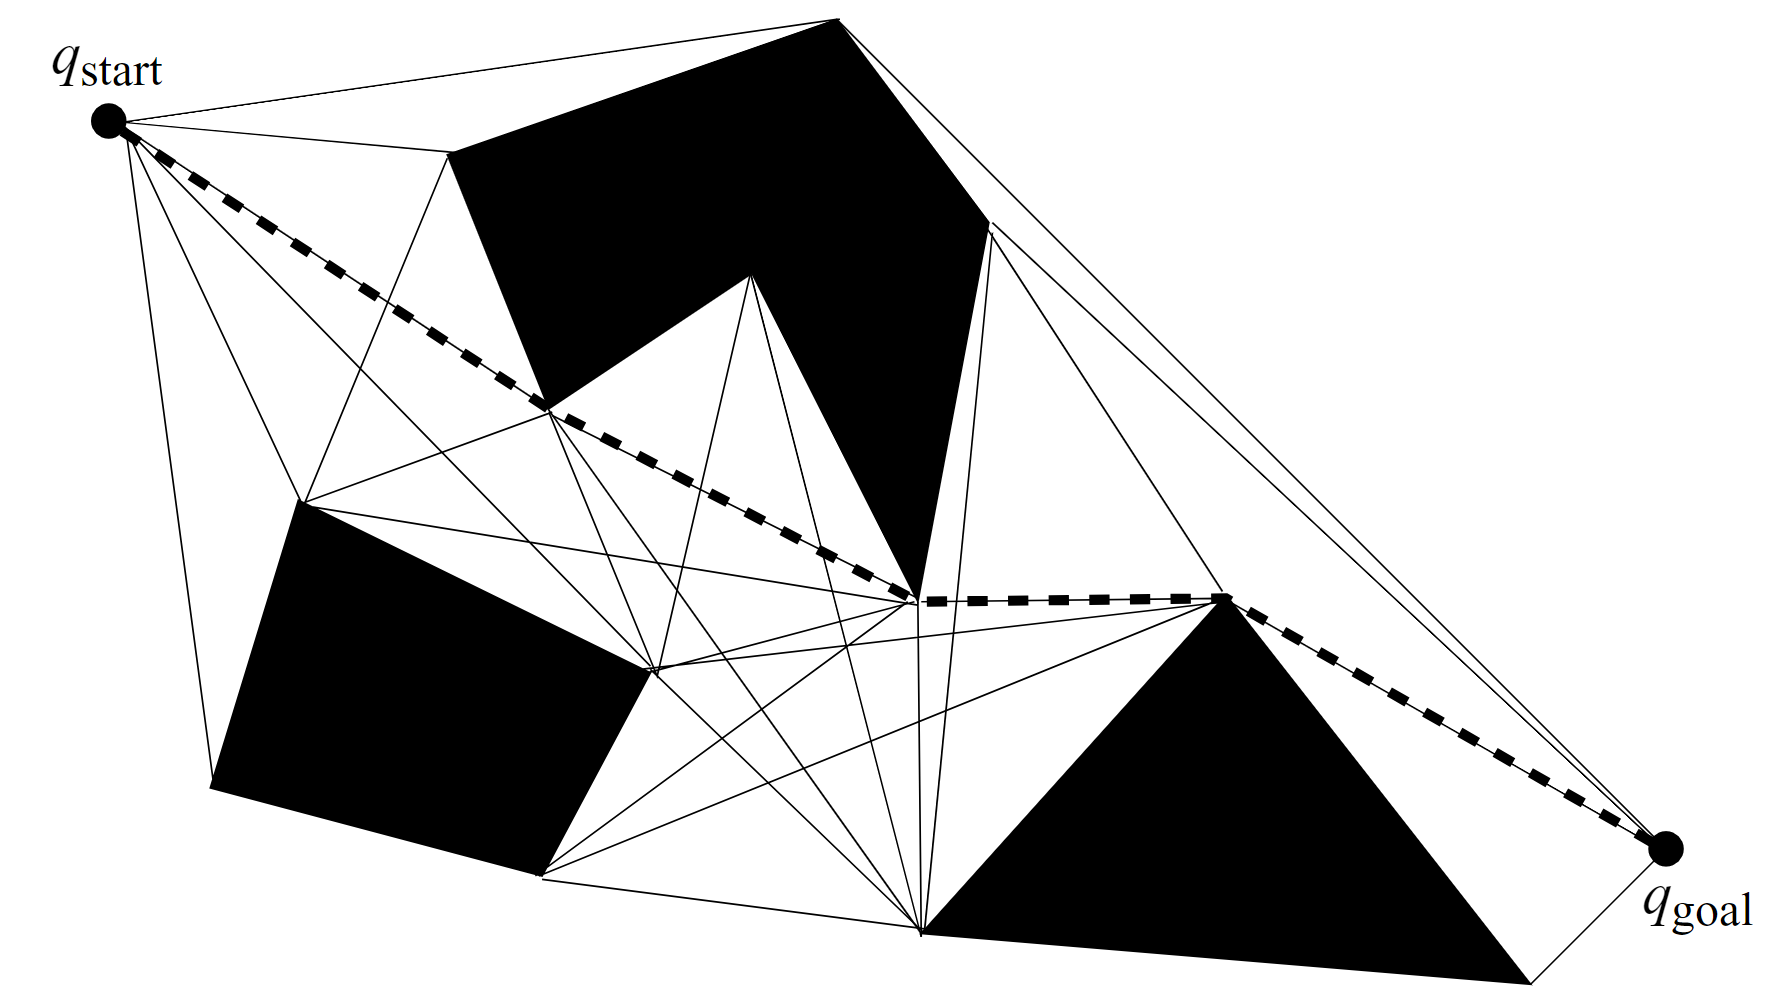

O grafo resultante serve como *roadmap*, não só para ir de $q_{\text{start}}$ para $q_{\text{goal}}$, mas permite planejar caminhos do veículo para outras regiões do mapa. Tudo isso usando técnicas de teoria dos grafos.
Sabendo que o veículo sempre inicia em uma certa posição, podemos explorar algoritmos de busca ainda mais eficientes na estrutura de árvore. Pretende-se então descobrir qual a árvore que passa por todos os vértices e o custo total é mínimo.

Caso o robô inicie em um local livre de obstáculo, mas não contemplado com um vértice, podemos tentar fazer um caminho em linha reta até o vértice mais próximo e de lá seguir o *roadmap* para o local desejado. Portanto, precisamos de uma rotina que descubra qual o vértice do grafo mais próximo dado um ponto no plano.

Agora é possível encontrar o caminho de  $q_{\text{start}}$ para $q_{\text{goal}}$. Para isso, pode ser usada uma técnica padrão de busca em árvore, seja busca por lagura, profundidade ou mesmo A*.

Da mesma forma, podemos rodar o algoritmo para um par de pontos aleatórios do mapa.